This is a document to "play around". The codes were not designed to be beautiful, but to see whether certain things work or do not work.

For the creation of some of the following codes ChatGPT was used.

In [27]:
import pandas as pd
import numpy as np
scores_df = pd.DataFrame(columns=['model', 'train_score', 'test_score'])


Train MSE: 0.0038451727017453697
Test MSE: 0.030464842072420943


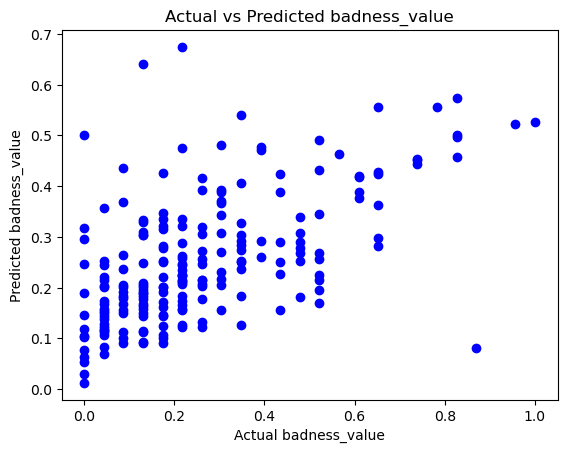

Train score 0.8995261193693794
Test score 0.3391737292590261


/var/folders/wr/nnzrl8p15wd8_8sccj0_s_rc0000gn/T/ipykernel_13962/2063608786.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = scores_df._append(


In [28]:
# RandomForestRegressor With Latitude & Langitude
# Train MSE: 0.0038547155743571854
# Test MSE: 0.03042240167379375
# RandomForestRegressor Without Latitude & Langitude
# Train MSE: 0.004100312001027768
# Test MSE: 0.03177396534953292


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) # max_depth=5
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'RandomForestRegressor',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

Train MSE: 0.03243663666615944
Test MSE: 0.03885834321032734


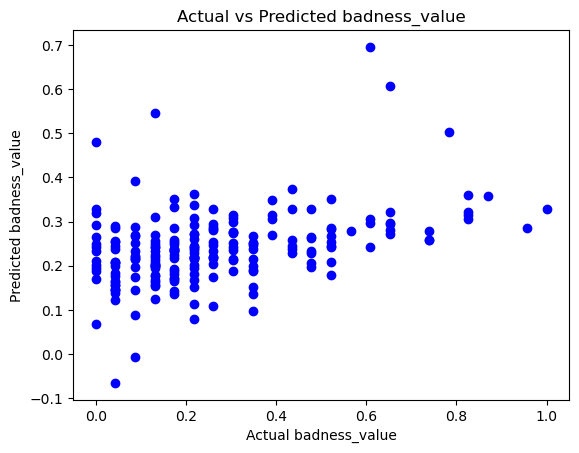

Train score 0.15243475046642252
Test score 0.15710660932328735


In [29]:
# LinearRegression With Latitude & Langitude
# Train MSE: 0.03243663666630069
# Test MSE: 0.03885834321012592
# LinearRegression Without Latitude & Langitude
# Train MSE: 0.033219802995041105
# Test MSE: 0.03939541798404742

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'LinearRegression',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

Train MSE: 0.0327257183924121
Test MSE: 0.04072102230568137


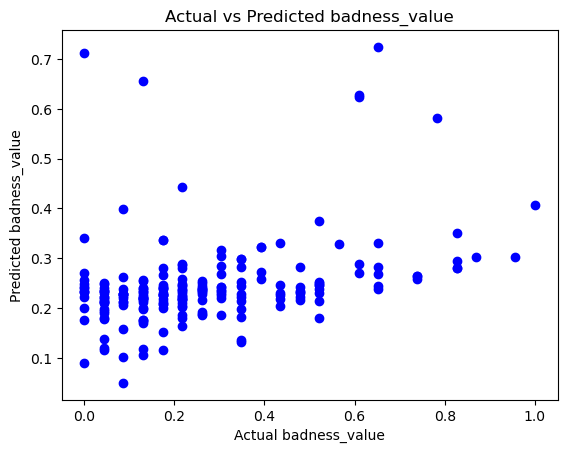

In [30]:
# Quadratic Linear Regression With Latitude & Langitude
# Train MSE: 0.03030231695926336
# Test MSE: 0.04143978368909678
# Quadratic Linear Regression without Latitude & Langitude
# Train MSE: 0.03272571631523935
# Test MSE: 0.04072107135772726

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Adding quadratic terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()


Train MSE: 0.03258072680245458
Test MSE: 0.04294778264128939


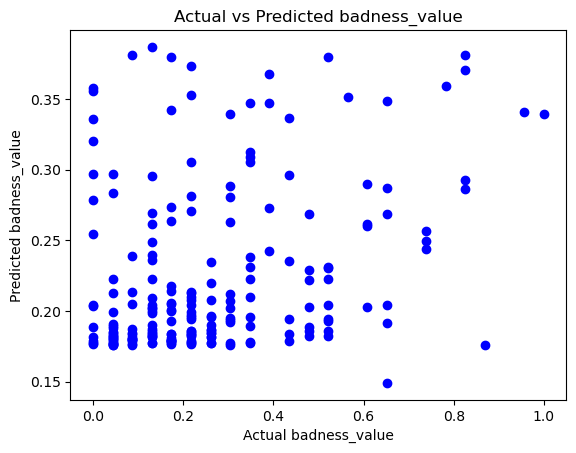

Train score 0.14866969326948665
Test score 0.0684007823848255


In [31]:
# SVR 'linear' With Latitude & Langitude: Not work
# SVR 'linear' without Latitude & Langitude: Not work
# SVR 'poly' With Latitude & Langitude
# Train MSE: 0.03979192106856868
# Test MSE: 0.04801349725028373
# SVR 'poly' without Latitude & Langitude
# Train MSE: 0.03979192106856868
# Test MSE: 0.04801349725028373
# SVR 'rbf with
# Train MSE: 0.03258083047109337
# Test MSE: 0.042948047794678104
# SVR 'rbf' without
# Train MSE: 0.03258083047109337
# Test MSE: 0.042948047794678104

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SVR(kernel='rbf') # 'linear', 'poly', 'rbf'
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'SVR rbf',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

Train MSE: 0.025062583735569948
Test MSE: 0.047225576743076335


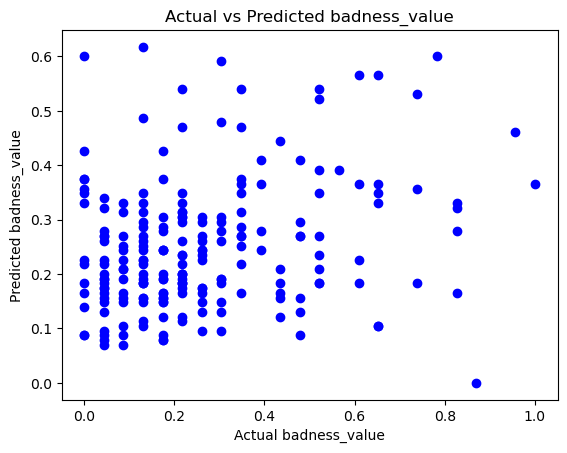

Train score 0.3451178290640686
Test score -0.024390728451224586


In [32]:
# KNeighborsRegressor With Latitude & Langitude
# Train MSE: 0.025062583735569948
# Test MSE: 0.047225576743076335
# KNeighborsRegressor without Latitude & Langitude
# Train MSE: 0.025062583735569948
# Test MSE: 0.047225576743076335


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'KNeighborsRegressor',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

In [33]:
# Naive Bayes for regression With Latitude & Langitude
# Train MSE: 4.888349514563107
# Test MSE: 6.713592233009709
# Naive Bayes for regression without Latitude & Langitude
# Train MSE: 4.888349514563107
# Test MSE: 6.713592233009709


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Discretizing the target variable into bins
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_bins = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).flatten()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 4.888349514563107
Test MSE: 6.713592233009709


Train MSE: 0.02391923588432752
Test MSE: 0.040298001698142266


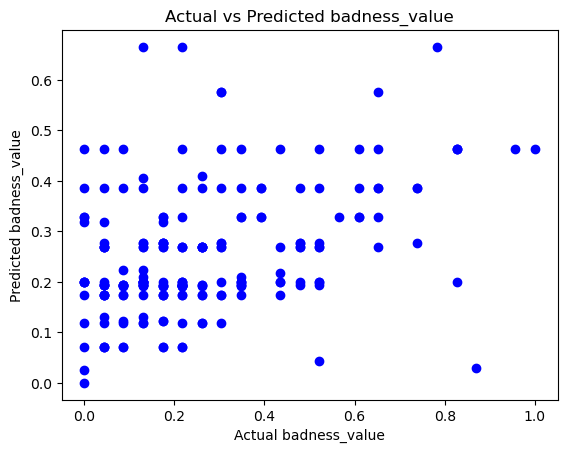

Train score 0.37499336507649905
Test score 0.12587834470987658


In [34]:
# Decision Trees With Latitude & Langitude
# Train MSE: 0.02308888066169388
# Test MSE: 0.04012265019706819
# Decision Trees without Latitude & Langitude
# Train MSE: 0.02391923588432752
# Test MSE: 0.0405386299417804

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth to control the size of the tree
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'DecisionTreeRegressor',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

Train MSE: 0.01983981352046447
Test MSE: 0.03346427543097449


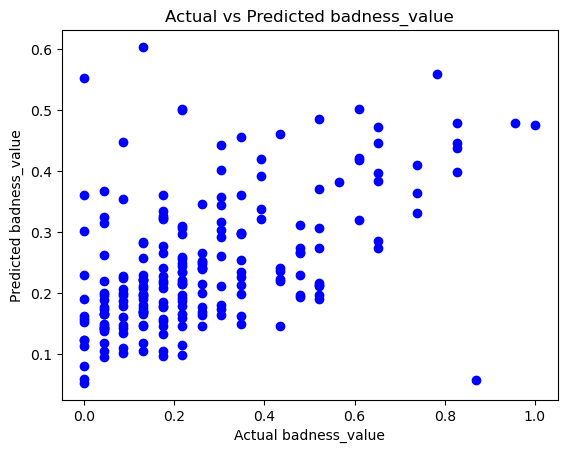

Train score 0.48158816001057647
Test score 0.27411170281040176


In [35]:
# Bagging with
# Train MSE: 0.019033784791433
# Test MSE: 0.03305247920925669
# Bagging without
# Train MSE: 0.019837457187863537
# Test MSE: 0.033460481464378175


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  
# You can adjust n_estimators and max_depth as per your requirement
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

scores_df = scores_df._append(
    {
        'model': 'RandomForestRegressor2',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

Train MSE: 0.004949428329587288
Test MSE: 0.03264392048569484


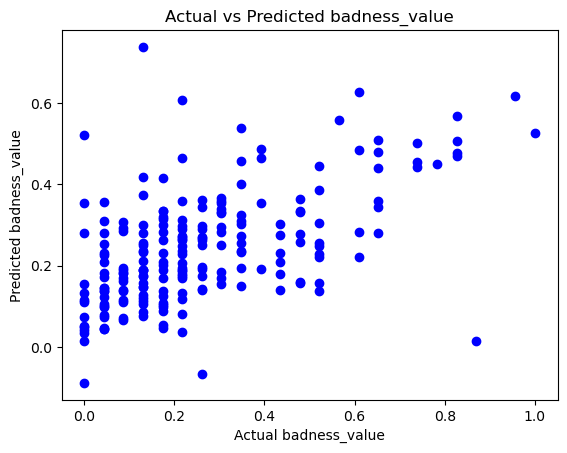

Train score 0.870672058253446
Test score 0.2919063822603841
Train score 0.870672058253446
Test score 0.2919063822603841


In [36]:
# Boosting with 
# Train MSE: 0.004174828566540168
# Test MSE: 0.03162303560203103
# Boosting without
# Train MSE: 0.004949428329587288
# Test MSE: 0.03264392048569484

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual badness_value')
plt.ylabel('Predicted badness_value')
plt.title('Actual vs Predicted badness_value')
plt.show()

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

scores_df = scores_df._append(
    {
        'model': 'GradientBoostingRegressor',
        'train_score': model.score(X_train, y_train),
        'test_score': model.score(X_test, y_test),
    },
    ignore_index=True,
)

print('Train score',model.score(X_train, y_train))
print('Test score',model.score(X_test, y_test))

In [37]:
# ! pip install tensorflow

7/7 [==============================] - 0s 486us/step
Train MSE: 0.015501959511993462
Test MSE: 0.036663614966418706


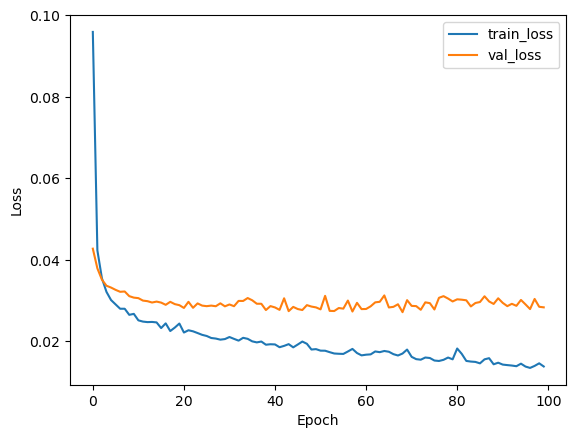

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
data = pd.read_csv('master_df_reduced.csv')

# Selecting predictors and outcome
X = data[['Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'pop_total']]
y = data['badness_value']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plotting the results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [39]:
# RandomForestRegressor With Latitude & Langitude
# Train MSE: 0.0038547155743571854
# Test MSE: 0.03042240167379375
# RandomForestRegressor Without Latitude & Langitude
# Train MSE: 0.004100312001027768
# Test MSE: 0.03177396534953292

# LinearRegression With Latitude & Langitude
# Train MSE: 0.03243663666630069
# Test MSE: 0.03885834321012592
# LinearRegression Without Latitude & Langitude
# Train MSE: 0.033219802995041105
# Test MSE: 0.03939541798404742

# Quadratic Linear Regression With Latitude & Langitude
# Train MSE: 0.03030231695926336
# Test MSE: 0.04143978368909678
# Quadratic Linear Regression without Latitude & Langitude
# Train MSE: 0.03272571631523935
# Test MSE: 0.04072107135772726

# SVR 'linear' With Latitude & Langitude: Not work
# SVR 'linear' without Latitude & Langitude: Not work
# SVR 'poly' With Latitude & Langitude
# Train MSE: 0.03979192106856868
# Test MSE: 0.04801349725028373
# SVR 'poly' without Latitude & Langitude
# Train MSE: 0.03979192106856868
# Test MSE: 0.04801349725028373
# SVR 'rbf with
# Train MSE: 0.03258083047109337
# Test MSE: 0.042948047794678104
# SVR 'rbf' without
# Train MSE: 0.03258083047109337
# Test MSE: 0.042948047794678104

# KNeighborsRegressor With Latitude & Langitude
# Train MSE: 0.025062583735569948
# Test MSE: 0.047225576743076335
# KNeighborsRegressor without Latitude & Langitude
# Train MSE: 0.025062583735569948
# Test MSE: 0.047225576743076335

# Naive Bayes for regression With Latitude & Langitude
# Train MSE: 4.888349514563107
# Test MSE: 6.713592233009709
# Naive Bayes for regression without Latitude & Langitude
# Train MSE: 4.888349514563107
# Test MSE: 6.713592233009709

# Decision Trees With Latitude & Langitude
# Train MSE: 0.02308888066169388
# Test MSE: 0.04012265019706819
# Decision Trees without Latitude & Langitude
# Train MSE: 0.02391923588432752
# Test MSE: 0.0405386299417804

# Bagging with
# Train MSE: 0.019033784791433
# Test MSE: 0.03305247920925669
# Bagging without
# Train MSE: 0.019837457187863537
# Test MSE: 0.033460481464378175

# Boosting with 
# Train MSE: 0.004174828566540168
# Test MSE: 0.03162303560203103
# Boosting without
# Train MSE: 0.004949428329587288
# Test MSE: 0.03264392048569484




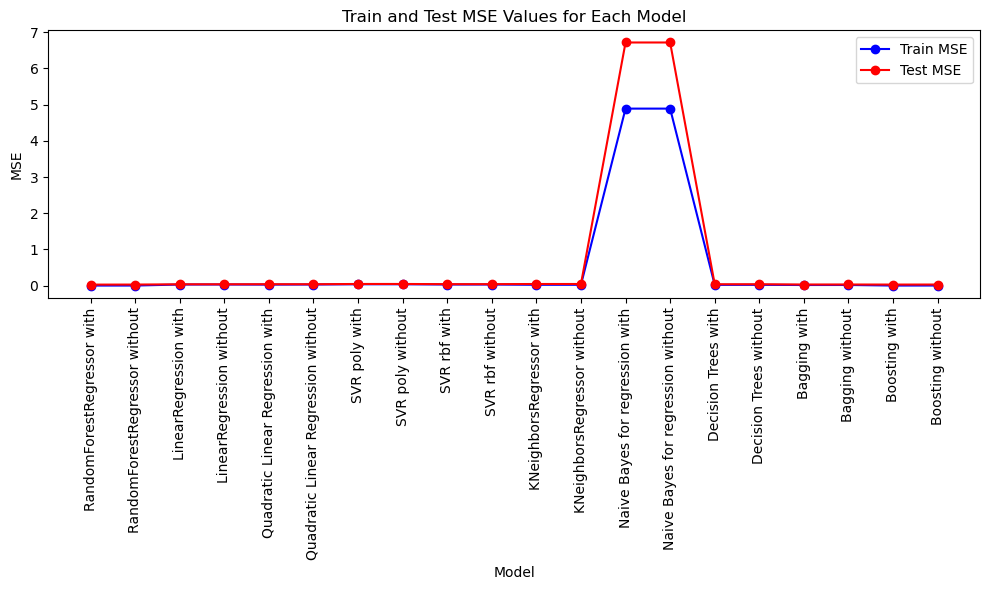

In [40]:
import matplotlib.pyplot as plt

# Train and test MSE values for each model
models = ['RandomForestRegressor with', 'RandomForestRegressor without',
          'LinearRegression with', 'LinearRegression without',
          'Quadratic Linear Regression with', 'Quadratic Linear Regression without',
          'SVR poly with', 'SVR poly without',
          'SVR rbf with', 'SVR rbf without',
          'KNeighborsRegressor with', 'KNeighborsRegressor without',
          'Naive Bayes for regression with', 'Naive Bayes for regression without',
          'Decision Trees with', 'Decision Trees without',
          'Bagging with', 'Bagging without',
          'Boosting with', 'Boosting without']

train_mse_values = [0.0038547155743571854, 0.004100312001027768,
                    0.03243663666630069, 0.033219802995041105,
                    0.03030231695926336, 0.03272571631523935,
                    0.03979192106856868, 0.03979192106856868,
                    0.03258083047109337, 0.03258083047109337,
                    0.025062583735569948, 0.025062583735569948,
                    4.888349514563107, 4.888349514563107,
                    0.02308888066169388, 0.02391923588432752,
                    0.019033784791433, 0.019837457187863537,
                    0.004174828566540168, 0.004949428329587288]

test_mse_values = [0.03042240167379375, 0.03177396534953292,
                   0.03885834321012592, 0.03939541798404742,
                   0.04143978368909678, 0.04072107135772726,
                   0.04801349725028373, 0.04801349725028373,
                   0.042948047794678104, 0.042948047794678104,
                   0.047225576743076335, 0.047225576743076335,
                   6.713592233009709, 6.713592233009709,
                   0.04012265019706819, 0.0405386299417804,
                   0.03305247920925669, 0.033460481464378175,
                   0.03162303560203103, 0.03264392048569484]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, train_mse_values, marker='o', linestyle='-', color='b', label='Train MSE')
plt.plot(models, test_mse_values, marker='o', linestyle='-', color='r', label='Test MSE')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Train and Test MSE Values for Each Model')
plt.legend()
plt.tight_layout()
plt.show()


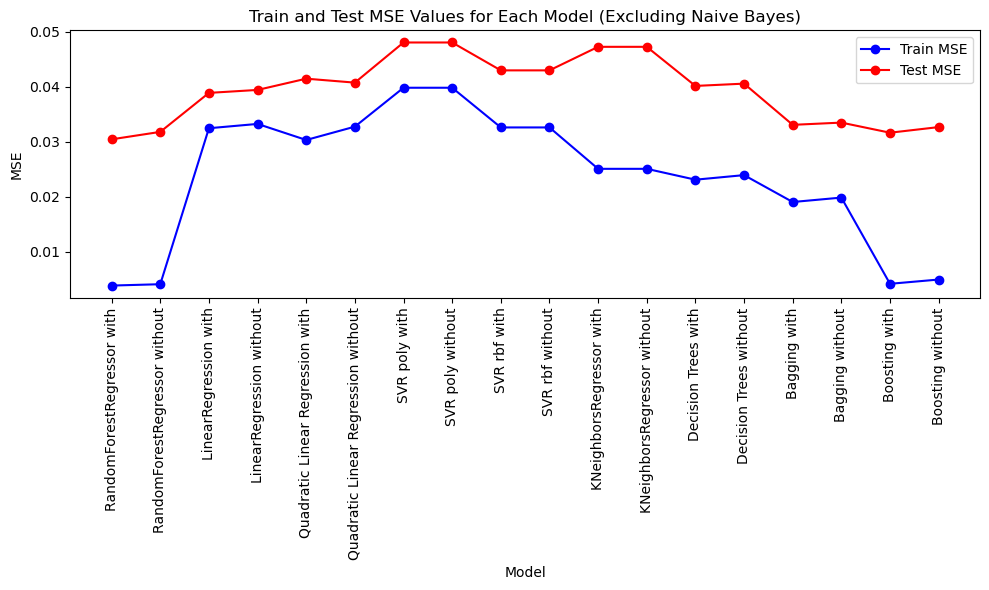

In [41]:
import matplotlib.pyplot as plt

# Train and test MSE values for each model
models = ['RandomForestRegressor with', 'RandomForestRegressor without',
          'LinearRegression with', 'LinearRegression without',
          'Quadratic Linear Regression with', 'Quadratic Linear Regression without',
          'SVR poly with', 'SVR poly without',
          'SVR rbf with', 'SVR rbf without',
          'KNeighborsRegressor with', 'KNeighborsRegressor without',
          'Decision Trees with', 'Decision Trees without',
          'Bagging with', 'Bagging without',
          'Boosting with', 'Boosting without']

train_mse_values = [0.0038547155743571854, 0.004100312001027768,
                    0.03243663666630069, 0.033219802995041105,
                    0.03030231695926336, 0.03272571631523935,
                    0.03979192106856868, 0.03979192106856868,
                    0.03258083047109337, 0.03258083047109337,
                    0.025062583735569948, 0.025062583735569948,
                    0.02308888066169388, 0.02391923588432752,
                    0.019033784791433, 0.019837457187863537,
                    0.004174828566540168, 0.004949428329587288]

test_mse_values = [0.03042240167379375, 0.03177396534953292,
                   0.03885834321012592, 0.03939541798404742,
                   0.04143978368909678, 0.04072107135772726,
                   0.04801349725028373, 0.04801349725028373,
                   0.042948047794678104, 0.042948047794678104,
                   0.047225576743076335, 0.047225576743076335,
                   0.04012265019706819, 0.0405386299417804,
                   0.03305247920925669, 0.033460481464378175,
                   0.03162303560203103, 0.03264392048569484]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, train_mse_values, marker='o', linestyle='-', color='b', label='Train MSE')
plt.plot(models, test_mse_values, marker='o', linestyle='-', color='r', label='Test MSE')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Train and Test MSE Values for Each Model (Excluding Naive Bayes)')
plt.legend()
plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'RandomForestRegressor'),
  Text(1, 0, 'LinearRegression'),
  Text(2, 0, 'SVR rbf'),
  Text(3, 0, 'KNeighborsRegressor'),
  Text(4, 0, 'DecisionTreeRegressor'),
  Text(5, 0, 'RandomForestRegressor2'),
  Text(6, 0, 'GradientBoostingRegressor')])

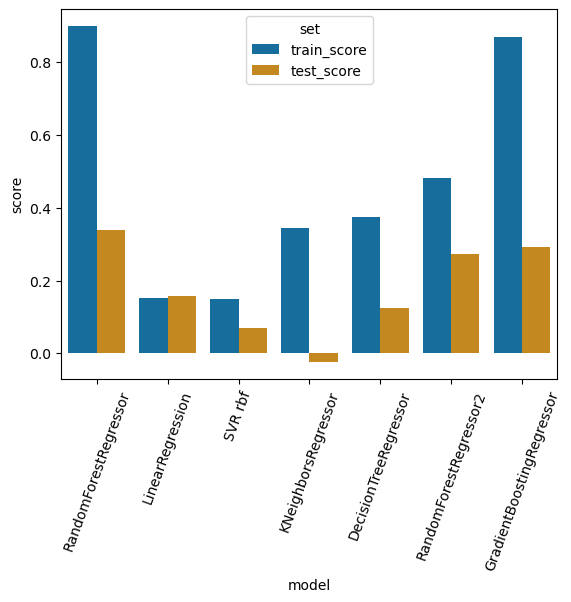

In [45]:
import seaborn as sns

scores_df_melt = scores_df.melt(
    id_vars=['model'],
    value_vars=['train_score', 'test_score'],
    value_name='score',
    var_name='set',
)

sns.barplot(scores_df_melt, x='model', y='score', hue='set', palette="colorblind")
plt.xticks(rotation=70) 